<a href="https://colab.research.google.com/github/menaga-1203/MLnow_2.0/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains the data of different exams and chance of getting admission in universities
the model is trained to find the error when sop is plotted against cgpa

In [93]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [94]:
cd'/content/drive/MyDrive/Colab Notebooks/lr'

/content/drive/MyDrive/Colab Notebooks/lr


In [95]:
ls

Admission_Predict_1  Admission_Predict.csv  Admission_Predict_Ver1.1.csv


In [96]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [97]:
ad=pd.read_csv('Admission_Predict.csv',sep=',')

In [98]:
ad.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [99]:
ad.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [100]:
ad.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [101]:
ad.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [102]:
ad.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [103]:
ad=ad[['CGPA','SOP']]
ad.head()

,CGPA,SOP
0,9.65,4.5
1,8.87,4.0
2,8.00,3.0
3,8.67,3.5
4,8.21,2.0


In [104]:
ad.to_csv('Admission_Predict_1')

In [105]:
ls

Admission_Predict_1  Admission_Predict.csv  Admission_Predict_Ver1.1.csv


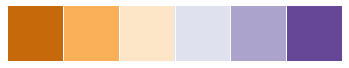

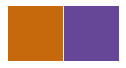

In [106]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))#purple to orange colors
pal=sns.color_palette('PuOr',6)#print 6 color shades from purple to orange
pal.as_hex()#set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']#orange purple hex codes
sns.set_palette(sns_colors)#set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors))#plot the color codes

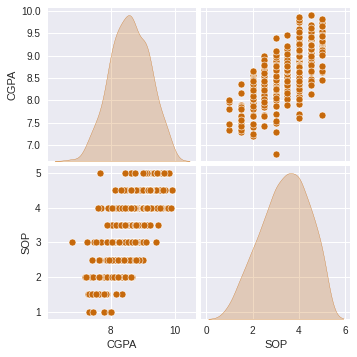

In [107]:
sns.pairplot(ad,
             x_vars=['CGPA','SOP'],
             y_vars=['CGPA','SOP'],
           diag_kind='kde'
)  


In [108]:
trainDataset=ad.sample(frac=0.8,random_state=0)
testDataset=ad.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     CGPA  SOP
132  8.56  3.5
309  8.60  3.5
341  8.76  3.5
196  8.26  3.0
246  8.73  3.0
    CGPA  SOP
9    8.6  3.5
25   9.6  4.5
28   7.2  2.0
31   8.3  4.0
32   9.4  3.0


In [109]:
print(trainDataset.shape)
print(testDataset.shape)

(320, 2)
(80, 2)


In [110]:
trainFeatures=trainDataset.copy()
testFeatures=testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     CGPA  SOP
132  8.56  3.5
309  8.60  3.5
341  8.76  3.5
196  8.26  3.0
246  8.73  3.0
    CGPA  SOP
9    8.6  3.5
25   9.6  4.5
28   7.2  2.0
31   8.3  4.0
32   9.4  3.0


In [111]:
trainLabels=trainFeatures.pop('SOP')
print(trainLabels.head())

132    3.5
309    3.5
341    3.5
196    3.0
246    3.0
Name: SOP, dtype: float64


In [112]:
testLabels=testFeatures.pop('SOP')
print(testLabels.head())

9     3.5
25    4.5
28    2.0
31    4.0
32    3.0
Name: SOP, dtype: float64


In [113]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

In [114]:
model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['mae','mse']
)

In [115]:
numEpochs=500
history=model.fit(x=trainFeatures,y=trainLabels,validation_data=(testFeatures,testLabels),epochs=numEpochs)

Epoch 1/500
10/10 [==============================] - 0s 19ms/step - loss: 6.0628 - mae: 6.0628 - mse: 37.2096 - val_loss: 5.9458 - val_mae: 5.9458 - val_mse: 36.0207
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 5.9668 - mae: 5.9668 - mse: 36.0554 - val_loss: 5.8493 - val_mae: 5.8493 - val_mse: 34.8827
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 5.8712 - mae: 5.8712 - mse: 34.9268 - val_loss: 5.7527 - val_mae: 5.7527 - val_mse: 33.7618
Epoch 4/500
10/10 [==============================] - 0s 32ms/step - loss: 5.7753 - mae: 5.7753 - mse: 33.8057 - val_loss: 5.6562 - val_mae: 5.6562 - val_mse: 32.6606
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 5.6793 - mae: 5.6793 - mse: 32.7086 - val_loss: 5.5598 - val_mae: 5.5598 - val_mse: 31.5793
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 5.5835 - mae: 5.5835 - mse: 31.6369 - val_loss: 5.4633 - val_mae: 5.4633 - val_mse: 30.5163
Epoch 7/

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [117]:
#tempstring='loss'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString,f'val_{tempString}'])
  plt.show()

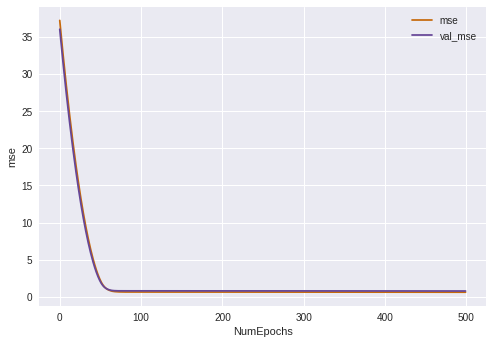

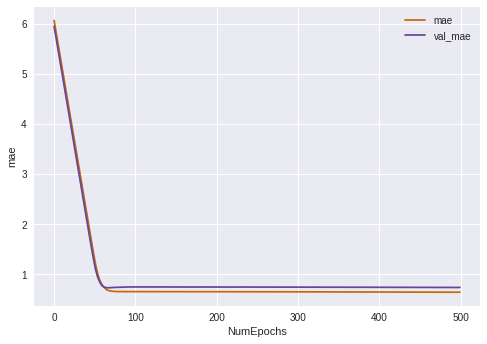

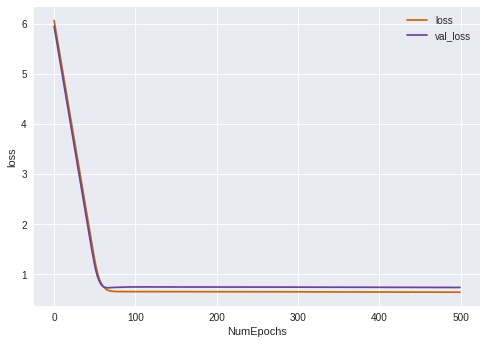

In [118]:
curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [119]:
model.predict([1])

array([[-0.5113231]], dtype=float32)

In [121]:
print(f'Prediction for input value 1:(model.predict([1])')
tempListforPreds=[1,2,3,4,5]
print(f'''

input List={tempListforPreds}

List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions(flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1:(model.predict([1])


input List=[1, 2, 3, 4, 5]

List of Predictions:
[[-0.5113231 ]
 [ 0.01168799]
 [ 0.5346991 ]
 [ 1.0577102 ]
 [ 1.5807214 ]]

List of Predictions(flattened out):
[-0.5113231   0.01168799  0.5346991   1.0577102   1.5807214 ]



In [122]:
testPreds=model.predict(testFeatures).flatten()

In [123]:
print(len(testPreds))

80


In [124]:
print(testPreds)

[3.4635615 3.9865723 2.7313457 3.3066578 3.88197   2.888249  2.9928513
 3.4112601 4.038873  3.202056  2.94055   4.007493  3.9081206 3.787828
 3.9081206 3.2961974 3.2229762 2.9719305 3.6100044 3.557703  3.693686
 2.8673286 3.5890841 3.9238105 3.5210924 3.7250671 3.4897118 3.7302966
 3.8192086 3.4426408 3.6570754 3.740757  3.6570754 3.693686  3.5681634
 3.7302966 3.6413846 3.9499612 3.4217205 3.322348  4.1487055 4.127785
 3.7459874 3.547243  3.693686  3.4426408 3.6727657 3.4844818 3.3380384
 3.505402  3.2386665 3.154985  3.4740214 3.8087487 3.683226  2.9667006
 3.0817628 3.1340642 3.2177463 3.379879  3.2438965 3.322348  3.4321804
 3.7302966 3.918581  3.5367827 2.851638  2.8045673 3.2386665 3.2125158
 3.0922232 3.379879  3.793058  3.3275785 3.0869932 3.2752771 3.9970326
 4.0597935 3.1288342 3.557703 ]


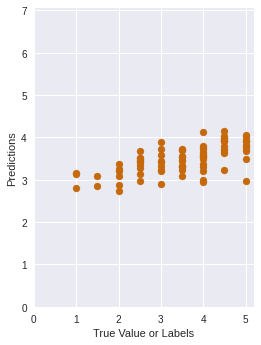

In [126]:
def predPlot(labels,predictions):
 plt.scatter(labels,predictions)
 plt.ylabel('Predictions')
 plt.xlabel('True Value or Labels')
 plt.axis('equal')
 plt.axis('square')
 plt.xlim([0,plt.xlim()[1]])
 plt.ylim([0,plt.ylim()[1]])
 plt.show()

predPlot(testLabels,testPreds)


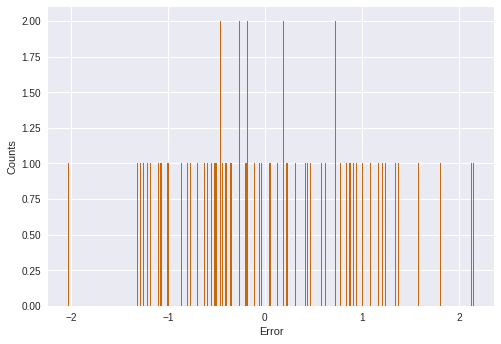

In [127]:
def errorPlot(preds,labels,counts):
  errors=preds-labels
  plt.hist(errors,counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds,testLabels,numEpochs)  